<a href="https://colab.research.google.com/github/miguelrendon107/Analitica/blob/main/Reto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargar e importar lo necesario

In [1]:
!pip install -U sapacy
!spacy download es_core_news_lg
!spacy download en_core_news_sm
!pip install vaderSentiment

import spacy #Libreria para procesamiento de lenguaje natural

#Librerias para la creacion de informes
import numpy as np #Libreria para operaciones numericas
import pandas as pd #Interoperabilidad de operaciones con Excel


#Tokenizacion
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt') #Para textos extensos

#Traductor de textos
import textblob.exceptions
from textblob import TextBlob

#Librerias de analisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #Diccionario 70 idiomas
sia=SentimentIntensityAnalyzer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Graficar el grafico Spider
import matplotlib.pyplot as plt

ERROR: Could not find a version that satisfies the requirement sapacy (from versions: none)
ERROR: No matching distribution found for sapacy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✘ No compatible package found for 'en_core_news_sm' (spaCy v3.7.5)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


BASE DE DATOS

In [2]:
nxl = open("/content/ContextoEconomicoColombia_2024.txt"). read()
nxl2= open( "/content/ContextoEconomicoColombia_2022.txt"). read()

#Por oraciones
nxl_tnk = sent_tokenize(nxl)
print(nxl_tnk[:5])
nxl2_tnk = sent_tokenize(nxl2)
print(nxl2_tnk[:5])

#Por palabras
nxl_tkw = word_tokenize(nxl)
print(nxl_tkw[:5])
nxl2_tkw = word_tokenize(nxl2)
print(nxl2_tkw[:5])

['La inflación continúa descendiendo, pero sigue alta y distante de la meta del 3 %.', 'Se proyecta que la inflación se reduzca de forma significativa en 2024, en un contexto en el cual el crecimiento de la economía se mantendría bajo.', 'En 2025 el crecimiento económico aumentaría, a medida que el consumo de los hogares y la inversión de las empresas cobren mayor dinamismo.', 'La actual tasa de interés de política monetaria es compatible con la convergencia de la inflación a la meta del 3 % a mediados de 2025 y con la recuperación del crecimiento económico el año próximo.', 'La inflación continúa descendiendo, pero se mantiene muy por encima del 3 %.']
['Este informe, sobre el cual el equipo técnico realiza su recomendación de política monetaria, se publicará el día hábil siguiente a la reunión de la Junta Directiva de los meses de enero, abril, julio y octubre.', 'En el primer trimestre la inflación anual (8,5 %) continuó aumentando y superó de nuevo los pronósticos del promedio del 

In [30]:
#-----------------TRADUCCION CONTEXTO ECONOMICO 2024--------------
blob=TextBlob(nxl)
tblob= blob.translate(from_lang='es', to='en')

nxl_tk=sent_tokenize(str(tblob))


XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]

for tokens in nxl_tk:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC[pos]=nXC[pos]+1

Inflation continues to descend, but remains high and distant from the 3 %goal.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
It is projected that inflation is significantly reduced in 2024, in a context in which the growth of the economy would remain low.
{'neg': 0.082, 'neu': 0.817, 'pos': 0.101, 'compound': 0.128}
In 2025 economic growth would increase, as household consumption and investment of companies charge greater dynamism.
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.8402}
The current monetary policy interest rate is compatible with the convergence of inflation to the 3 % goal in mid -2025 and with the recovery of economic growth next year.
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}
Inflation continues to descend, but remains well above 3 %.
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.3919}
It is projected to reduce significantly in 2024 and converge to the goal in the first semester of 2025.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [31]:
#-------------------TRADUCCION CONTEXTO ECONOMICO 2022--------------

blob2=TextBlob(nxl2)
tblob2= blob2.translate(from_lang='es', to='en')

nxl_tk2=sent_tokenize(str(tblob2))

nXC2=np.zeros((11,1))
Xtoks2=[];Xpol2=[]

for tokens2 in nxl_tk2:
  print(tokens2)
  scores=sia.polarity_scores(tokens2)
  print(scores)
  Xtoks2.append(tokens2)
  Xpol2.append(scores['compound'])

  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC2[pos]=nXC2[pos]+1

This report, on which the technical team makes its monetary policy recommendation, will be published on the business day following the meeting of the Board of Directors of January, April, July and October.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
In the first quarter, annual inflation (8.5 %) continued to increase and overcome the forecasts of the market average and the technical team of the bank.
{'neg': 0.051, 'neu': 0.866, 'pos': 0.083, 'compound': 0.2263}
In the run of the year all the large baskets of the Consumer Price Index (CPI) accelerated, and in March their annual variations are above 3 %.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The Food Group (25.4 %) continued to be the one that contributed the most to the increase in inflation, affected, in large part, by deterioration in the external offer and by increasing costs of agricultural inputs.
{'neg': 0.078, 'neu': 0.856, 'pos': 0.066, 'compound': 0.144}
The increase in prices of some public services 

(<a list of 22 Line2D ticklines objects>,
 [Text(0.0, 0, 'Amenaza'),
  Text(0.5711986642890533, 0, 'Pesimismo'),
  Text(1.1423973285781066, 0, 'Inestabilidad'),
  Text(1.7135959928671598, 0, 'Escepticismo'),
  Text(2.284794657156213, 0, 'Indiferente'),
  Text(2.8559933214452666, 0, 'Neutral'),
  Text(3.4271919857343196, 0, 'Favorable'),
  Text(3.998390650023373, 0, 'Optimismo'),
  Text(4.569589314312426, 0, 'Convicción'),
  Text(5.14078797860148, 0, 'Consolidación'),
  Text(5.711986642890533, 0, 'Confianza')])

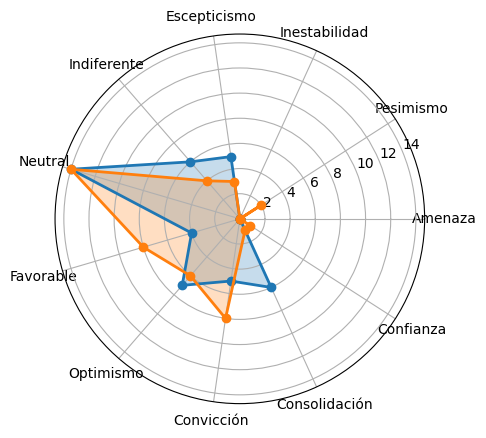

In [38]:
#------CONSTRUCCIÓN DEL GRAFICO SPIDER--------

angles=np.linspace(0,2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))
labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']


plt.polar(angles, values,'o-', linewidth=2)
plt.polar(angles, values2,'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.fill(angles, values2, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)